<img src="Images/new foot.png" width="100%">

# Naive Bayes Algorithm 
<img src="Images/NB_Intro.jpg" width="50%">

The Naive Bayes algorithm is simple and effective and should be one of the first methods you try on a classification problem. In this tutorial you are going to learn about the Naive Bayes algorithm including how it works.

## What is Naive Bayes algorithm?

- Based on Baye's Theorem
- Assumes predictors are independent i.e. 'Naive'

Naive Bayes model is easy to build and particularly useful for very large data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods.

<img src="Images/NB_f.jpg" width="70%">


# Iris Dataset 

Iris dataset is a typical machine learning classification problem. There are three species of Iris flower. When a new flower is given, we need to predict it belongs to which type. Following figure shows the samples of all three species  

<img src="Images/Iris_type.jpg" width="100%">

How to extract features from these flowers is a critical step. But, we don't have to do it by image processing. Some numeric measurements are given in ** Iris Datasets **
<img src="Images/Iris_measure.png" width="100%">

In [1]:
from sklearn import datasets
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

In [2]:
# load the iris datasets
iris = datasets.load_iris()
#df = pd.DataFrame(data.data, columns=data.feature_names)
#df.head()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
df["target"].value_counts()

0.0    50
2.0    50
1.0    50
Name: target, dtype: int64

In [6]:

sns.set(style="white", color_codes=True)

C:\Users\asifi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


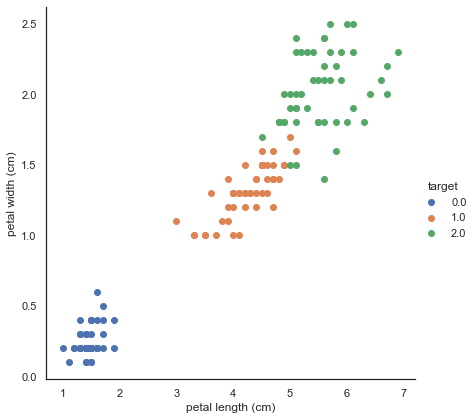

In [7]:
sns.FacetGrid(df, hue="target",size=6).map(plt.scatter, "petal length (cm)", "petal width (cm)").add_legend()

In [8]:
model = GaussianNB()
model.fit(iris.data, iris.target)


GaussianNB()

In [9]:
model.score(iris.data, iris.target)

0.96

### Make Predictions 


In [10]:
expected = iris.target
predicted = model.predict(iris.data)

### Summarize the fit of the model

In [11]:
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


### Variants of Naive Bayes in Scikit Learn

Again, scikit learn (python library) will help here to build a Naive Bayes model in Python. There are three types of Naive Bayes model under scikit learn library:

- **Gausiaan**: It is used in classification and it assumes that features follow a normal distribution.

- **Multinomial**:It is used for discrete counts. For example, let’s say,  we have a text classification problem. We have “count how often word occurs in the document”, you can think of it as “number of times outcome number x_i is observed over the n trials”.

- **Bernoulli**: The binomial model is useful if your feature vectors are binary (i.e. zeros and ones).

## Multinomial Naive Bayes 

In [12]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [13]:
model.fit(iris.data, iris.target)
expected = iris.target
predicted = model.predict(iris.data)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.92      0.93        50
           2       0.92      0.94      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150

[[50  0  0]
 [ 0 46  4]
 [ 0  3 47]]


## Bernoulli Naive Bayes

In [14]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()

In [15]:
model.fit(iris.data, iris.target)
expected = iris.target
predicted = model.predict(iris.data)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50        50
           1       0.00      0.00      0.00        50
           2       0.00      0.00      0.00        50

    accuracy                           0.33       150
   macro avg       0.11      0.33      0.17       150
weighted avg       0.11      0.33      0.17       150

[[50  0  0]
 [50  0  0]
 [50  0  0]]


C:\Users\asifi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asifi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\asifi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Tunning Parameter 

In [16]:
def Naive_bayes(Model_Type):
        # import some data to play with
        iris = datasets.load_iris()
        X = iris.data[:, :2]  # we only take the first two features.
        Y = iris.target
        h = .02  # step size in the mesh
        # we create an instance of Neighbours Classifier and fit the data.
        if(Model_Type=='Gaussian'):
            model =  GaussianNB()
        elif (Model_Type=='Multinomial'):
                model =  MultinomialNB()                         
        else:
                model =  BernoulliNB()  
                
        model.fit(X, Y)
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure(1, figsize=(4, 3))
        plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.show()
        
        model.fit(iris.data, iris.target)
        expected = iris.target
        predicted = model.predict(iris.data)
        print(metrics.classification_report(expected, predicted))
        print(metrics.confusion_matrix(expected, predicted))

In [17]:
from IPython.html import widgets
from IPython.html.widgets import interact
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

C:\Users\asifi\Anaconda3\lib\site-packages\IPython\html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "


In [18]:
i = interact(Naive_bayes, Model_Type=['Gaussian','Multinomial','Bernoulli'])

interactive(children=(Dropdown(description='Model_Type', options=('Gaussian', 'Multinomial', 'Bernoulli'), val…